In [ ]:
!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/Building Blocks of Neural Networks/Bank Churn Prediction Project.ipynb" --output "Bank Churn Prediction Project"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Building Blocks of Neural Networks/Bank Churn Prediction Project.ipynb to html
[NbConvertApp] Writing 1772528 bytes to /content/drive/MyDrive/Colab Notebooks/Building Blocks of Neural Networks/Bank Churn Prediction Project.html


# **Bank Churn Prediction - Problem Statement**

## **Description**

**Background and Context**

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Objective**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Data Description**

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

**Data Dictionary**

* **CustomerId:** Unique ID which is assigned to each customer
* **Surname:** Last name of the customer
* **CreditScore:** It defines the credit history of the customer.  
* **Geography:** A customer’s location    
* **Gender:** It defines the Gender of the customer   
* **Age:** Age of the customer     
* **Tenure:** Number of years for which the customer has been with the bank
* **NumOfProducts:** It refers to the number of products that a customer has purchased through the bank.
* **Balance:** Account balance
* **HasCrCard:** It is a categorical variable that decides whether the customer has a credit card or not.
* **EstimatedSalary:** Estimated salary
* **isActiveMember:** It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* **Exited:** It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values
  
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )

In [ ]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

# (Greatlearning Login)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Loading Libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

# (Greatlearning Login)

## **Loading and Reading Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Building Blocks of Neural Networks/Churn (2).csv')

### **Print the first five rows of the data**

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Checking the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#Checking the shape of the data
data.shape

(10000, 14)

* The data has 10,000 rows and 14 columns

In [ ]:
# Let's check for duplicate values in the data
data.duplicated().sum()

0

* There are no duplicated values

In [ ]:
#finding the null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There is no missing data

In [ ]:
# Checking the number of unique values for each feature
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* Each value of the columns 'RowNumber' and 'CustomerId' are unique identifiers for a customer. We will drop these columns.
* 'Surname' does not seem to add value to the model so we will drop this column as well.

In [ ]:
# Dropping 'RowNumber' and 'CustomerId' columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
# checking the first 5 rows after dropping columns
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Let's see what type of unique values each column has.
for i in data.describe().columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

# (Greatlearning Login)

Unique values in CreditScore are :
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
**************************************************
Unique values in Age are :
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
**************************************************
Unique values in Tenure are :
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
**************************************************
Unique values in Balance are :
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: Balance, Length: 6382, dtype: int64
************************

## **Observations**
* 233 customers have a 850 credit score
* Ages 34-37 have the most customers
* Two-year tenure has the most customers
* There are 3617 customers that have a zero balance in their accounts
* Most of the customers have 1-2 number of products
* 7055 customers have credit cards
* More than half of the customers are active members
* There are two customers with 24924 estimated salaries, this may be the same customer.
* 20% of the customers are exiting.


In [ ]:
# Let's view the statistical summary of the numerical columns inthe data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


## **Observations**
* CreditScore - median is slightly higher than the mean, indicating a slight left skewed distribution 652 vs 650. The maximum credit score is 850. 75% of the credit scores are 718 or lower.
* Age - average age of customers are 39 with a maximum age of 92. 75% of the customers are 44 years on or younger.
* Tenure - mean and median are close to the same
* Balance - average balance 76485 is lower than the median 97198, indicating a left skew of the balance. There are some zero balances but we did not see in missing values in the dataset.
* NumOfProducts - 75% of the customers have 2 products or less.
* HasCrCard - 75% of the customers have one credit card.
* IsActiveMember - most of the customers are still active members
* EstimatedSalary - mean and median are close to the same
* Exited - we really cannot determine anything off the statistical data.

# **Exploratory Data Analysis (EDA)**
## **Univariate Analysis**

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# (Greatlearning Login)

**Geography**

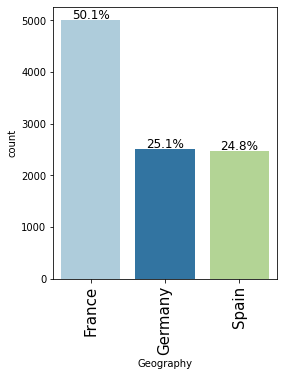

In [ ]:
labeled_barplot(data, "Geography", perc=True)
# (Greatlearning Login)

* France has the most customers at 50%, followed by Germany 25%, then Spain at 24.8%

**Gender**

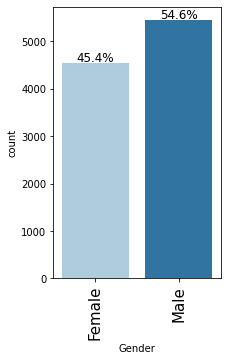

In [ ]:
labeled_barplot(data, "Gender", perc=True)
# (Greatlearning Login)

* Males are the most customers at 54.6%

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# (Greatlearning Login)

**CreditScore**

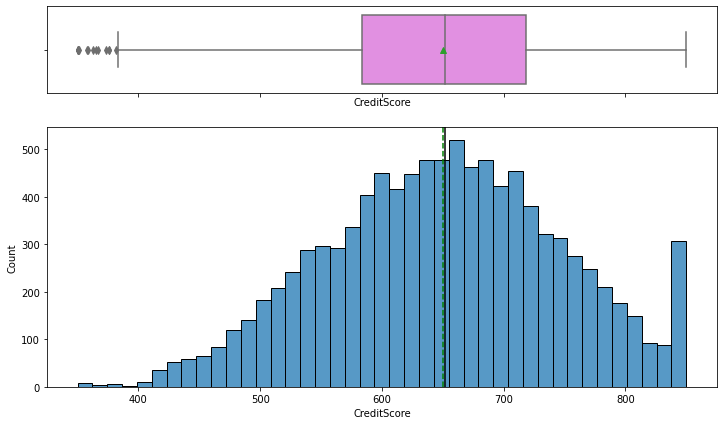

In [ ]:
histogram_boxplot(data, "CreditScore")
# (Greatlearning Login)

* Credit Score is slightly left skewed with outliers below 400 as the data in the statistical summary indicated

**Age**

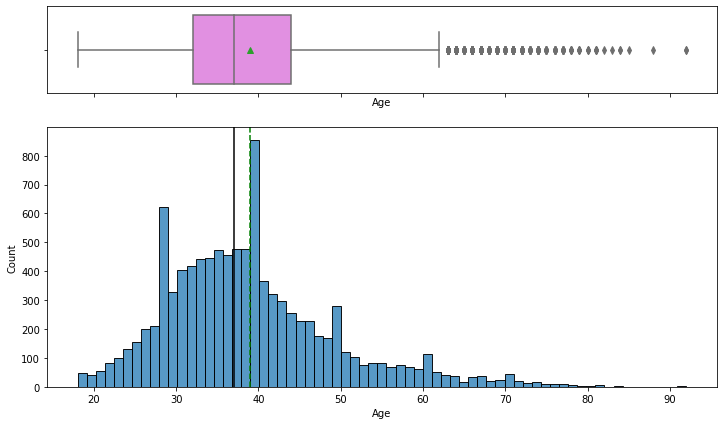

In [ ]:
histogram_boxplot(data, "Age")
# (Greatlearning Login)

* Age is right shewed with several outliers; oldest customer is 92 years old.

**Tenure**

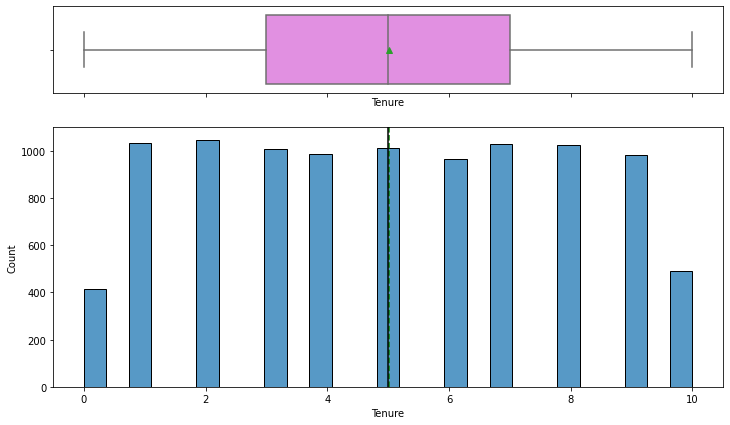

In [ ]:
histogram_boxplot(data, "Tenure")
# (Greatlearning Login)

* Tenure is normally distributed

**Balance**

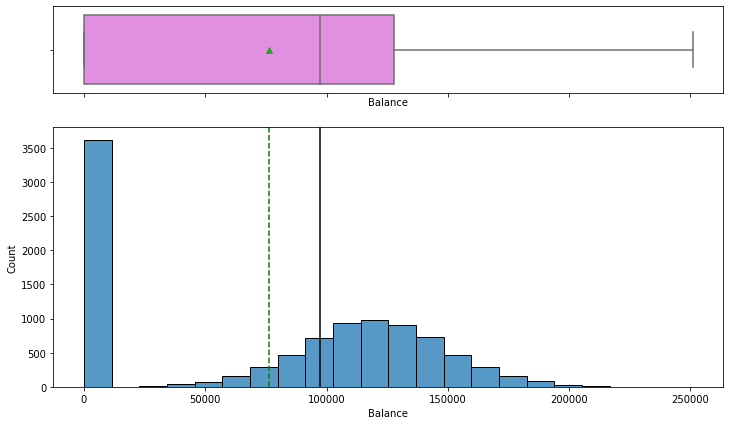

In [ ]:
histogram_boxplot(data, "Balance")
# (Greatlearning Login)

* Balance is left skewed with a heavy number of customers with zero balances

**NumOfProducts**

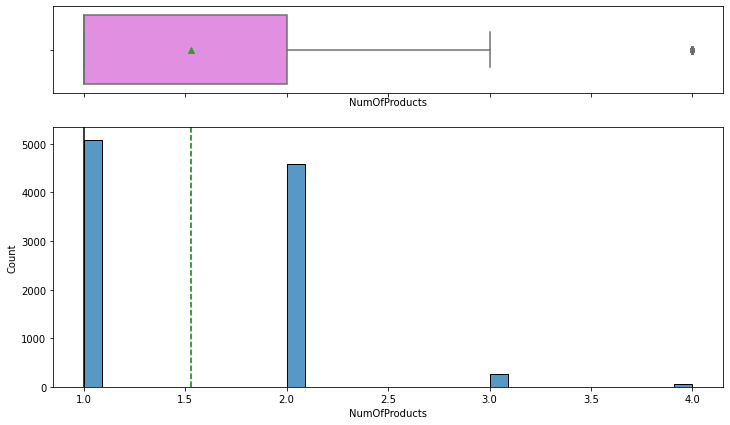

In [ ]:
histogram_boxplot(data, "NumOfProducts")
# (Greatlearning Login)

* NumOfProducts is right skewed with one outlier of 4 products, on average customers have 1.5 products

**HasCrCard**

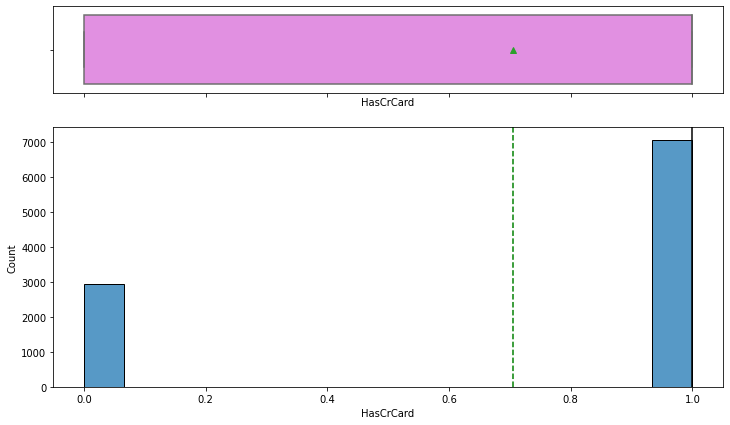

In [ ]:
histogram_boxplot(data, "HasCrCard")
# (Greatlearning Login)

* HasCrCard is left skewed; ~3000 customers do not have a card while 7000 customer have at least 1 card.

**IsActiveMember**

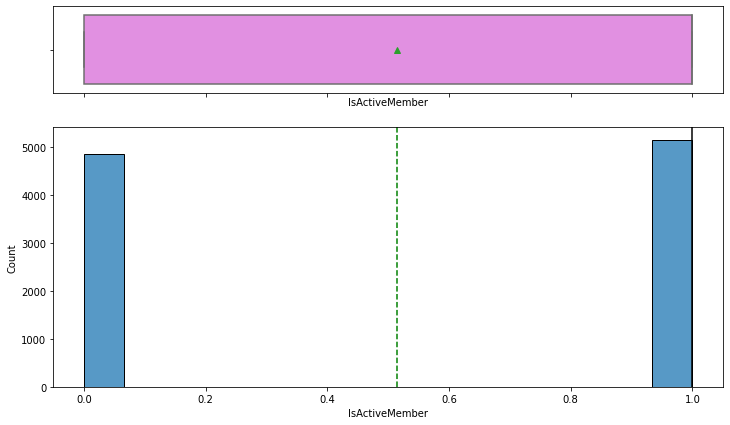

In [ ]:
histogram_boxplot(data, "IsActiveMember")
# (Greatlearning Login)

* IsActiveMember is left skewed.

**EstimatedSalary**

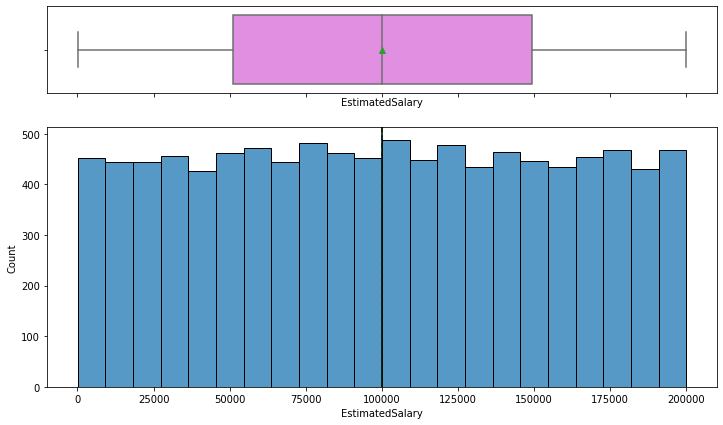

In [ ]:
histogram_boxplot(data, "EstimatedSalary")
# (Greatlearning Login)

* EstimatedSalary is normally distributed; 75% of the customer's salaries are $149,388 or less.

**Exited**

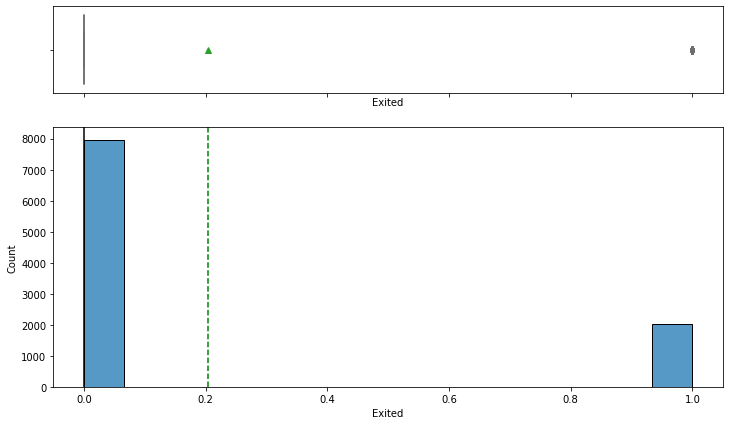

In [ ]:
histogram_boxplot(data, "Exited")
# (Greatlearning Login)

* Exited is skewed to the right with one outlier; over 2000 of the customers are churning.

0    7963
1    2037
Name: Exited, dtype: int64


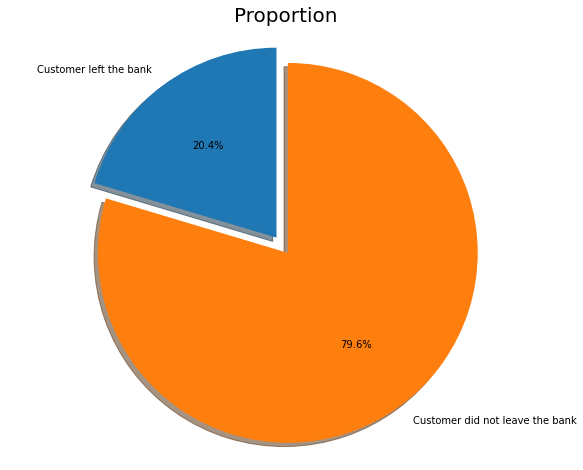

In [ ]:
print(data.Exited.value_counts())
labels = 'Customer left the bank', 'Customer did not leave the bank'
# sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Proportion', size=20)
plt.show()

# (Greatlearning Login)

* 20% (2037) of the customers left the bank

# **Bivariate Analysis**

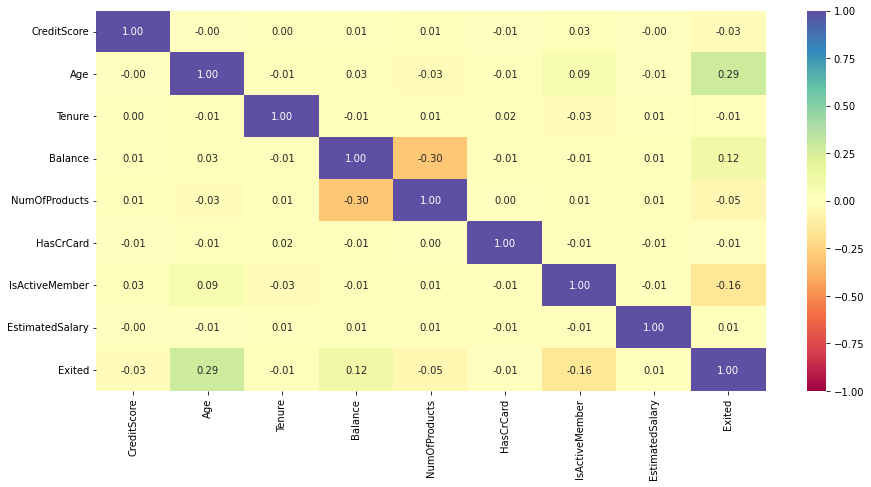

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

# (Greatlearning Login)

* Exited and Age has the highest correlation with 0.29
* NumOfProducts and Balance has the highest negative correlation of -0.30

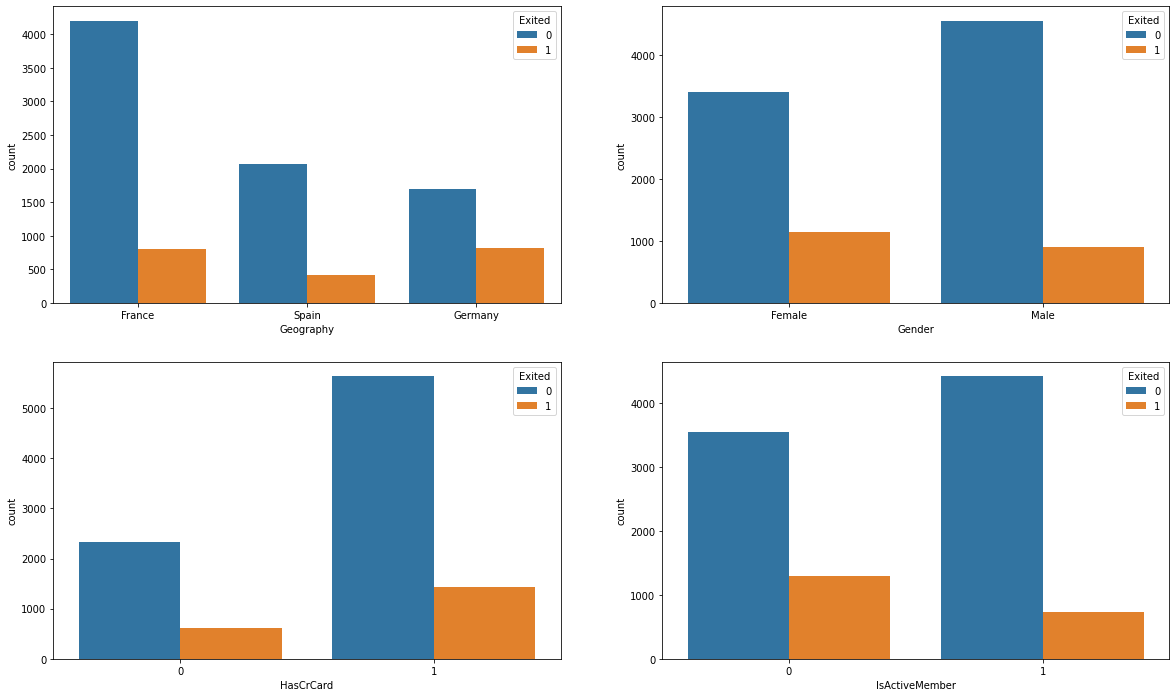

In [ ]:
### Function to plot distributions of categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1])

# (Bank Customer Churn Prediction)

## **Observations**
* As stated, before in the Univariate Analysis, France has the most customers. But we also can see that France and Germany churn rate seems close
* Female gender has the most churn rate
* Customers that have a credit card churn more than customers with a credit card
* Members who are not active churn more than active members
  * This maybe because inactive customers do not see a need to stay with the bank because they do not use the bank's service.


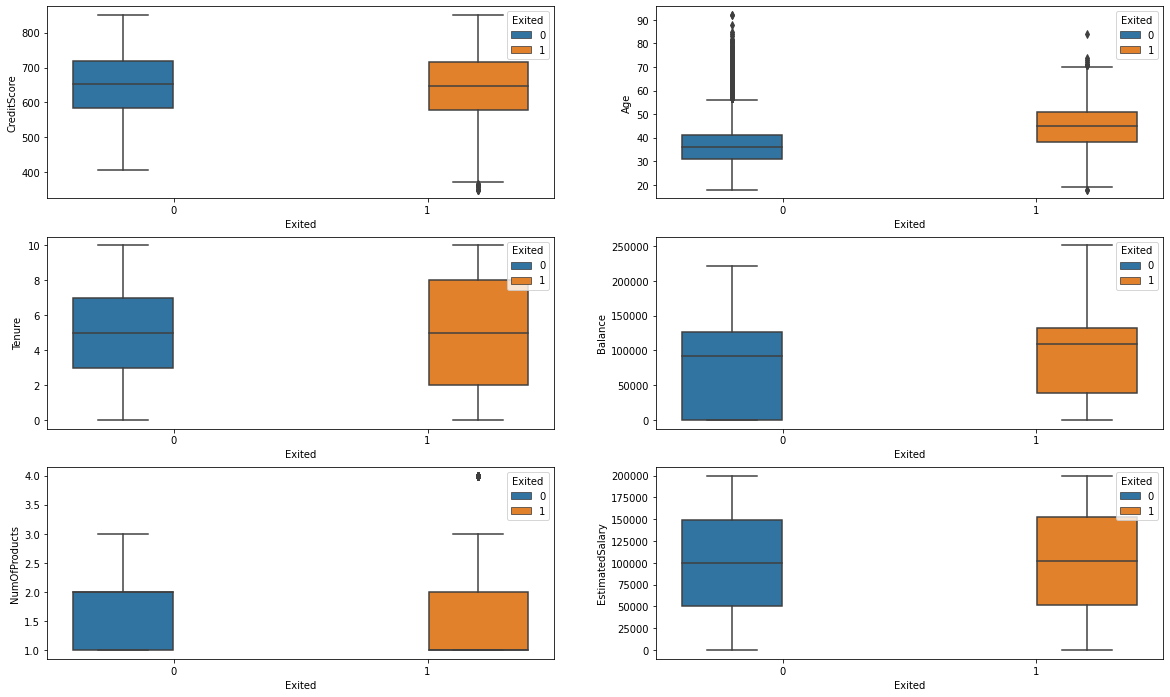

In [ ]:
### Function to plot distributions of continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data =data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])

# (Bank Customer Churn Prediction)

## **Observation**

* Credit score does not have an impact on which customer will churn
* Age is playing a role in churning, older customers tend to churn more than younger customers
* Tenure sees a larger range of customers churning.
* Higher balances are churning slightly more than lower balances
* Number of Products and Estimated Salary do not have an impact on which customer will churn


# **Observations and EDA Summary:**

## **Observations Summary:**

* 233 customers have a 850 credit score
* Ages 34-37 have the most customers
* Two-year tenure has the most customers
* There are 3617 customers that have a zero balance in their accounts
* Most of the customers have 1-2 number of products
* 7055 customers have credit cards
* More than half of the customers are active members
* There are two customers with 24924 estimated salaries, this may be the same customer.
* 20% of the customers are exiting.
* CreditScore - median is slightly higher than the mean, indicating a slight left skewed distribution 652 vs 650. The maximum credit score is 850. 75% of the credit scores are 718 or lower.
* Age - average age of customers are 39 with a maximum age of 92. 75% of the customers are 44 years on or younger.
* Tenure - mean and median are close to the same
* Balance - average balance 76485 is lower than the median 97198, indicating a left skew of the balance. There are some zero balances but we did not see in missing values in the dataset.
* NumOfProducts - 75% of the customers have 2 products or less.
* HasCrCard - 75% of the customers have one credit card.
* IsActiveMember - most of the customers are still active members
* EstimatedSalary - mean and median are close to the same
* Exited - we really cannot determine anything off the statistical data.

## **EDA Univariate Analysis Summary:**

* France has the most customers at 50%, followed by Germany 25%, then Spain at 24.8%
* Males are the most customers at 54.6%
* Credit Score is slightly left skewed with outliers below 400 as the data in the statistical summary indicated
* Age is right shewed with several outliers; oldest customer is 92 years old.
* Tenure is normally distributed
* Balance is left skewed with a heavy number of customers with zero balances
* NumOfProducts is right skewed with one outlier of 4 products, on average customers have 1.5 products
* HasCrCard is left skewed; ~3000 customers do not have a card while 7000 customer have at least 1 card.
* IsActiveMember is left skewed.
* EstimatedSalary is normally distributed
* EstimatedSalary is normally distributed; 75% of the customer's salaries are $149,388 or less.
* Exited is skewed to the right with one outlier; over 2000 of the customers are churning.

## **EDA Bivariate Analysis Summary:**

* Exited and Age has the highest correlation with 0.29
* NumOfProducts and Balance has the highest negative correlation of -0.30
* As stated, before in the Univariate Analysis, France has the most customers. But we also can see that France and Germany churn rate seems close
* Female gender has the most churn rate
* Customers that have a credit card churn more than customers with a credit card
* Members who are not active churn more than active members
  * This maybe because inactive customers do not see a need to stay with the bank because they do not use the bank's service.
* Credit score does not have an impact on which customer will churn
* Age is playing a role in churning, older customers tend to churn more than younger customers
* Tenure sees a larger range of customers churning.
* Higher balances are churning slightly more than lower balances
* Number of Products and Estimated Salary do not have an impact on which customer will churn



# **Data Pre-processing**

In [ ]:
# Let's train_test_split the data set
data_train = data.sample(frac=0.8,random_state=200)
data_test = data.drop(data_train.index)
print(len(data_train))
print(len(data_test))

# (Bank Customer Churn Prediction)

8000
2000


(-1.0, 5.0)

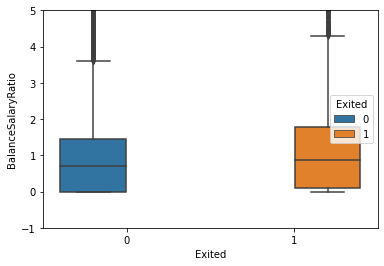

In [ ]:
# Let's create a new feature combining the ratios of Balance and Estimated Salary
data_train['BalanceSalaryRatio'] = data_train.Balance/data_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = data_train)
plt.ylim(-1, 5)

# (Bank Customer Churn Prediction)

* It does not appear that salary is a feature for churning of the customer even though the customers with the larger balance salary ratio is churning more.


**Why scaling is done?** The numerical columns present in this dataset are having different units, so scaling would help them all be in the same range.

**For example** - If you have multiple independent variables like age, salary, and height, With their range as (18–100 Years), (25,000–75,000 dollars), and (1–2 Meters) respectively, feature scaling would help them all to be in the same range.

(Greatlearning Login)

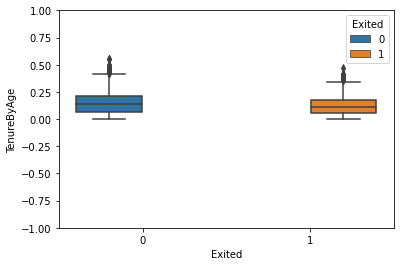

In [ ]:
# Let's create a new feature by standardizing Tenure over Age
data_train['TenureByAge'] = data_train.Tenure/(data_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = data_train)
plt.ylim(-1, 1)
plt.show()

# (Bank Customer Churn Prediction)

In [ ]:
# Let's create a new featuer using CreditScore and Age
data_train['CreditScoreGivenAge'] = data_train.CreditScore/(data_train.Age)

# (Bank Customer Churn Prediction)

In [ ]:
# Let's look at the first 5 rows of the data set with the new features
data_train.head()

# (Bank Customer Churn Prediction)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


In [ ]:
# Let's arrange columns by data type
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
data_train = data_train[['Exited'] + continuous_vars + cat_vars]
data_train.head()

# (Bank Customer Churn Prediction)

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [ ]:
# For the one hot variables, let's change 0 to -1 so that the models can capture a negative relation where the attribute in inapplicable instead of 0
data_train.loc[data_train.HasCrCard == 0, 'HasCrCard'] = -1
data_train.loc[data_train.IsActiveMember == 0, 'IsActiveMember'] = -1
data_train.head()

# (Bank Customer Churn Prediction)

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [ ]:
# Let's one hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (data_train[i].dtype == np.str or data_train[i].dtype == np.object):
        for j in data_train[i].unique():
            data_train[i+'_'+j] = np.where(data_train[i] == j,1,-1)
        remove.append(i)
data_train = data_train.drop(remove, axis=1)
data_train.head()

# (Bank Customer Churn Prediction)

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


In [ ]:
# Let's use minMax scaling for continuous variables
minVec = data_train[continuous_vars].min().copy()
maxVec = data_train[continuous_vars].max().copy()
data_train[continuous_vars] = (data_train[continuous_vars]-minVec)/(maxVec-minVec)
data_train.head()

# (Bank Customer Churn Prediction)

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [ ]:
# Now let's look at our data types
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 8159 to 9445
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exited               8000 non-null   int64  
 1   CreditScore          8000 non-null   float64
 2   Age                  8000 non-null   float64
 3   Tenure               8000 non-null   float64
 4   Balance              8000 non-null   float64
 5   NumOfProducts        8000 non-null   float64
 6   EstimatedSalary      8000 non-null   float64
 7   BalanceSalaryRatio   8000 non-null   float64
 8   TenureByAge          8000 non-null   float64
 9   CreditScoreGivenAge  8000 non-null   float64
 10  HasCrCard            8000 non-null   int64  
 11  IsActiveMember       8000 non-null   int64  
 12  Geography_Spain      8000 non-null   int64  
 13  Geography_France     8000 non-null   int64  
 14  Geography_Germany    8000 non-null   int64  
 15  Gender_Female        8000 non-null 

* All our data is in numeric form for modeling.

In [ ]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# (Bank Customer Churn Prediction)

In [ ]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method);
    fpr_data, tpr_data, _ = roc_curve(y_actual, method2);
    return (auc_score, fpr_data, tpr_data)

# (Bank Customer Churn Prediction)

In [ ]:
##Splitting Independent and dependent variable in X and Y respectively
X = data_train.drop(['Exited'],axis=1)
Y = data_train[['Exited']]

print(X.shape)
print(Y.shape)
print(type(X))

# (Greatlearning Login)

(8000, 16)
(8000, 1)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Splitting the dataset into the Training and Testing set.
X_big, X_test, y_big, y_test = train_test_split(X,Y, test_size = 0.1, random_state = 5,shuffle = True)

# (Greatlearning Login)

In [ ]:
# Splitting the dataset into the Training and validation set.
X_train, X_val, y_train, y_val = train_test_split(X_big,y_big, test_size = 0.3, random_state = 5,shuffle = True)

# (Greatlearning Login)

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
6209,0.680,0.297297,0.9,0.309456,0.000000,0.945269,0.000310,0.405000,0.294845,-1,-1,-1,1,-1,1,-1
9562,0.776,0.283784,0.5,0.000000,0.333333,0.571774,0.000000,0.230769,0.334650,1,1,-1,1,-1,-1,1
5369,0.450,0.459459,0.8,0.493927,0.000000,0.556535,0.000839,0.276923,0.147521,-1,-1,1,-1,-1,-1,1
2177,0.634,0.081081,0.4,0.000000,0.333333,0.171311,0.000000,0.300000,0.545648,-1,1,-1,1,-1,1,-1
1354,0.522,0.459459,0.7,0.000000,0.000000,0.367655,0.000000,0.242308,0.163992,-1,1,1,-1,-1,-1,1


# **Model Building**
  * We will now start with the model building process.

  * We will create a model.

    * Three hidden layer with ReLU as activation function.
    * Output layer with 1 nodes (For **regression** problem )

**A model can make wrong predictions in the following ways:**
* Predicting a customer will churn when customer does not churn.
* Predicting a customer will not churn when customer will churn.

**Which case is more important?**
For the purpose of this case, our interest is on the performance in predicting 1's (Customers who churn). Not tailoring banking services to the needs of a non-churning customers could make the non-churning customer dissatified with the bank because services are not tailored to their needs. Which could lead to customer churning. However, tailoring banking services to the needs of a churning customer will result in the bank suffering financial loss.

**How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

Since both errors are important for us to minimize, the bank would want the F1 Score evaluation metric to be maximized. Hence, the focus should be on increasing the F1 score rather than focusing on just one metric i.e. Recall or Precision.

(Greatlearning Login)



Since we are solving the regression module, we will scale the target variable. One of the reasons to scale the data is to reduce the time complexity for updating the weights during the backpropagation, which uses the derivatives.

**For classification problem, there is no need of scaling the target variable.**

(Greatlearning Login)

In [ ]:
# Checking the shape
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

# (Greatlearning Login)

(5040, 16)
(2160, 16)
(5040, 1)
(2160, 1)
(800, 16)
(800, 1)


### **Model-1**

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# (Greatlearning Login)

In [ ]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(16,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model.add(Dense(1, activation='sigmoid'))

# (Greatlearning Login)

In [ ]:
# Model summary
model.summary()

# (Greatlearning Login)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,257
Trainable params: 4,257
Non-trainable params: 0
_________________________________________________________________


### **Observations**

* The summary of the model shows each layer's name, type, output shape, and the number of parameters at that particular layer.
* It also shows the total number of trainable and non-trainable parameters in the model. A parameter whose value is learned while training the model is called a trainable parameter otherwise it is called a non-trainable parameter.
* In the first layer total parameters are calculated by the number of neurons in the hidden layer multiplied by the number of variables fed to neural networks plus bias. (16*64)+64 = 1088
* In the next layer the parameters are calculated by the number of outputs from the previous layer multiplied by the number of neurons in the second layer plus bias. (64*32)+32 =2080
* You can calculate for the third layer and final layer.

(Greatlearning Login)

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# (Greatlearning Login)

In [ ]:
history=model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
126/126 [==============================] - 1s 5ms/step - loss: 0.4842 - accuracy: 0.7924 - val_loss: 0.4683 - val_accuracy: 0.7976
Epoch 2/50
126/126 [==============================] - 0s 4ms/step - loss: 0.4529 - accuracy: 0.8023 - val_loss: 0.4531 - val_accuracy: 0.7996
Epoch 3/50
126/126 [==============================] - 1s 5ms/step - loss: 0.4371 - accuracy: 0.8088 - val_loss: 0.4403 - val_accuracy: 0.8016
Epoch 4/50
126/126 [==============================] - 1s 5ms/step - loss: 0.4223 - accuracy: 0.8202 - val_loss: 0.4260 - val_accuracy: 0.8046
Epoch 5/50
126/126 [==============================] - 1s 5ms/step - loss: 0.4124 - accuracy: 0.8264 - val_loss: 0.4260 - val_accuracy: 0.8244
Epoch 6/50
126/126 [==============================] - 1s 5ms/step - loss: 0.4062 - accuracy: 0.8271 - val_loss: 0.4179 - val_accuracy: 0.8214
Epoch 7/50
126/126 [==============================] - 1s 5ms/step - loss: 0.4059 - accuracy: 0.8281 - val_loss: 0.4159 - val_accuracy: 0.8244
Epoch 

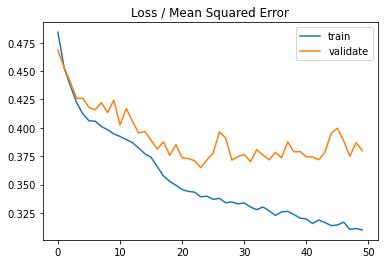

In [ ]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

# (Greatlearning Login)

Here the model seems to be overfitted, as the distance between the train curve and validation curve started increasing. There is noise in the validation curve.

Let's check the other metrics.

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

# (Greatlearning Login)

25/25 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

# (Greatlearning Login)

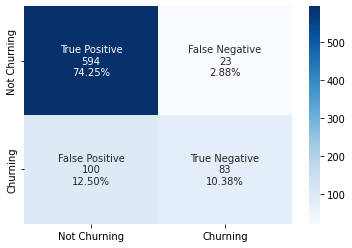

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

# (Greatlearning Login)

Here, the 2.88% of False Negatives is because we gave 0.5 as the threshold to the model, and as this is an imbalanced dataset, we should calculate the threshold using the AUC-ROC curve.

In [ ]:
# Accuracy as per the clasification report
from sklearn import metrics
cr = metrics.classification_report(y_test, y_pred)
print(cr)

# (Greatlearning Login)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       617
           1       0.78      0.45      0.57       183

    accuracy                           0.85       800
   macro avg       0.82      0.71      0.74       800
weighted avg       0.84      0.85      0.83       800



As you can see, the above model has a good accuracy but a moderate F1-score. This could be due to the imbalanced dataset. We observe that the False positive rates are also high at 12.5%, which should be considerably lower.

1) **Imbalanced dataset**: As you have seen in the EDA, this dataset is imbalanced, and it contains more examples that belong to the 0 class.

2) **Decision Threshold**: Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction.

Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

**Model 2**

**Early stopping:**

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after the certian interations.The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called **“early stopping”** and is perhaps one of the oldest and most widely used forms of neural network regularization.

(Greatlearning Login)

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# (Greatlearning Login)

In [ ]:
# Initializing the model
model1 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model1.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(16,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model1.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model1.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model1.add(Dense(1, activation='sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

# (Greatlearning Login)

In [ ]:
# Model summary
model1.summary()

# (Greatlearning Login)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,257
Trainable params: 4,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

# (Greatlearning Login)

Epoch 1/50
63/63 [==============================] - 1s 6ms/step - loss: 0.4990 - accuracy: 0.7857 - val_loss: 0.4728 - val_accuracy: 0.7986
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.8016 - val_loss: 0.4635 - val_accuracy: 0.8016
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4479 - accuracy: 0.8058 - val_loss: 0.4494 - val_accuracy: 0.7986
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4361 - accuracy: 0.8105 - val_loss: 0.4386 - val_accuracy: 0.8026
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4230 - accuracy: 0.8180 - val_loss: 0.4318 - val_accuracy: 0.8095
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4140 - accuracy: 0.8217 - val_loss: 0.4251 - val_accuracy: 0.8165
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4083 - accuracy: 0.8259 - val_loss: 0.4202 - val_accuracy: 0.8234
Epoch 8/50
63/63 [==

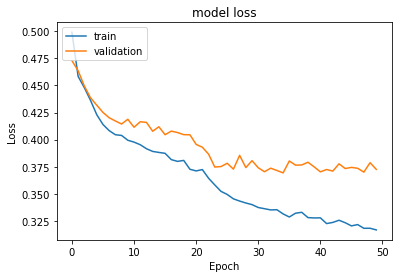

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# (Greatlearning Login)

* There is some noise in the validation and some overfitting but the train is starting to smooth.

Let's check the other metrices.

25/25 [==============================] - 0s 1ms/step
Best Threshold=0.154147, G-Mean=0.761


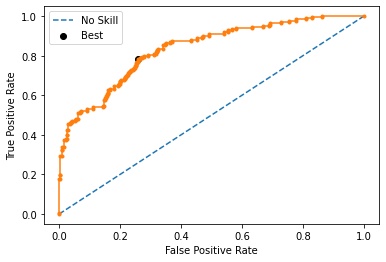

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot

# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# (Greatlearning Login)

**Let's tune the threshold using ROC-AUC**

There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = True Positive / (True Positive + False Negative)

Specificity = True Negative / (False Positive + True Negative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(), and select the threshold with the **largest G-Mean value**.

(Greatlearning Login)

In [ ]:
# Predicting the results using best as a threshold
y_pred_e1= model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

# (Greatlearning Login)

25/25 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [

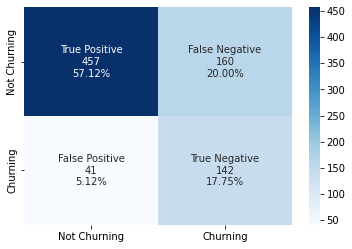

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

# (Greatlearning Login)

In [ ]:
# Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test, y_pred_e1)
print(cr)

# (Greatlearning Login)

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       617
           1       0.47      0.78      0.59       183

    accuracy                           0.75       800
   macro avg       0.69      0.76      0.70       800
weighted avg       0.82      0.75      0.77       800



As the number of layers in the neural network has increased, we can see that the macro F1 score has decreased, and the False Negative percentage has increased to 20.00%.

Now let's try to use the Batch Normalization technique and check to see if we can increase the F1 score.
* Let's use two Regularization techniques to reduce the overfitting problem.
  * Dropout
  * BatchNormalization

**Model-3**

**Dropout**

Dropout is a regularization technique for neural network models proposed by Srivastava, et al. in their 2014 paper Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Dropout is a technique where randomly selected neurons are ignored during training. They are **“dropped-out”** randomly.

(Greatlearning Login)



In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# (Greatlearning Login)

In [ ]:
# Initializing the model
model2 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model2.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(16,)))
# Adding Dropout with 20%
model2.add(Dropout(0.2))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model2.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding Dropout with 10%
model2.add(Dropout(0.2))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model2.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model2.add(Dense(1, activation='sigmoid'))

# (Greatlearning Login)

In [ ]:
# Model summary
model2.summary()

# (Greatlearning Login)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,713
Trainable params: 3,713
Non-trainabl

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

# (Greatlearning Login)

In [ ]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

# (Greatlearning Login)

Epoch 1/50
63/63 [==============================] - 1s 7ms/step - loss: 0.5238 - accuracy: 0.7845 - val_loss: 0.4849 - val_accuracy: 0.7966
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4893 - accuracy: 0.7934 - val_loss: 0.4724 - val_accuracy: 0.7966
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4752 - accuracy: 0.7964 - val_loss: 0.4698 - val_accuracy: 0.7966
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4693 - accuracy: 0.7991 - val_loss: 0.4653 - val_accuracy: 0.7966
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4656 - accuracy: 0.7996 - val_loss: 0.4602 - val_accuracy: 0.7966
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4610 - accuracy: 0.7971 - val_loss: 0.4582 - val_accuracy: 0.7956
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4612 - accuracy: 0.8026 - val_loss: 0.4534 - val_accuracy: 0.7956
Epoch 8/50
63/63 [==

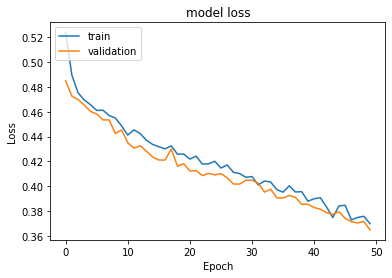

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# (Greatlearning Login)

After using Dropout technique the train and validation curves seems to be smoothing.

25/25 [==============================] - 0s 2ms/step
Best Threshold=0.233741, G-Mean=0.755


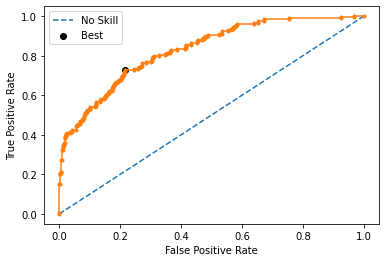

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# (Greatlearning Login)

In [ ]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

# (Greatlearning Login)

25/25 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

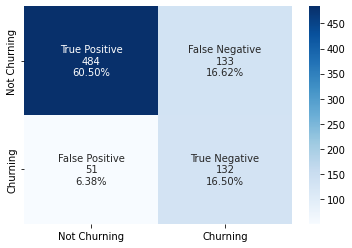

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

# (Greatlearning Login)

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

# (Greatlearning Login)

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       617
           1       0.50      0.72      0.59       183

    accuracy                           0.77       800
   macro avg       0.70      0.75      0.71       800
weighted avg       0.81      0.77      0.78       800



The Dropout technique increased the loss function of the model and reduced the accuracy slightly. The F1 score also seems to be fine, with a decrease in the False Negative rate.

Now let's try the BatchNormalization technique and see if we can improve the metrics.

**Model-4**

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# (Greatlearning Login)

In [ ]:
# Initializing the model
model3 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model3.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(16,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model3.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding Batch Normalization
model3.add(BatchNormalization())
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model3.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model3.add(Dense(1, activation='sigmoid'))

# (Greatlearning Login)

In [ ]:
# Model summary
model3.summary()

# (Greatlearning Login)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,321
Non-trainable params: 64
_____________________________________________________

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

# (Greatlearning Login)

In [ ]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

# (Greatlearning Login)

Epoch 1/50
63/63 [==============================] - 1s 7ms/step - loss: 0.5381 - accuracy: 0.7304 - val_loss: 0.4861 - val_accuracy: 0.7996
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4490 - accuracy: 0.8073 - val_loss: 0.4668 - val_accuracy: 0.8006
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4343 - accuracy: 0.8115 - val_loss: 0.4464 - val_accuracy: 0.8046
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4238 - accuracy: 0.8219 - val_loss: 0.4315 - val_accuracy: 0.8105
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4116 - accuracy: 0.8269 - val_loss: 0.4271 - val_accuracy: 0.8204
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4070 - accuracy: 0.8291 - val_loss: 0.4216 - val_accuracy: 0.8115
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4005 - accuracy: 0.8309 - val_loss: 0.4162 - val_accuracy: 0.8294
Epoch 8/50
63/63 [==

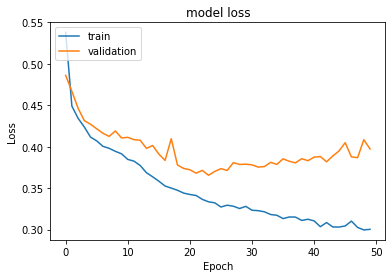

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# (Greatlearning Login)

From the above plot, we observe that validation curve has noise and train and validation are overfitting.

25/25 [==============================] - 0s 2ms/step
Best Threshold=0.269119, G-Mean=0.744


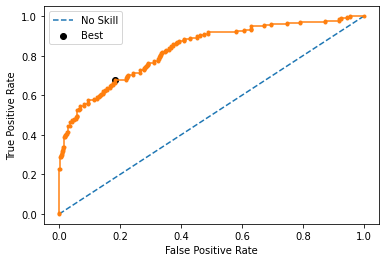

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()
# (Greatlearning Login)

In [ ]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

# (Greatlearning Login)

25/25 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

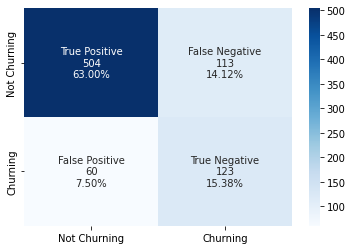

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_e3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm3,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

# (Greatlearning Login)

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

# (Greatlearning Login)

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       617
           1       0.52      0.67      0.59       183

    accuracy                           0.78       800
   macro avg       0.71      0.74      0.72       800
weighted avg       0.81      0.78      0.79       800



BatchNormalization technique is showing improvements on the loss function and accuracy. We also see False Negatives reduced but our False Positives increased.

Now, let's try to use some of the Hyperparameter Optimization techniques such as RandomizedSearchCV, GridSearchCV and Keras Tuner to increase the F1 score of the model.

**Model-5**

Random Search CV




In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# (Greatlearning Login)

In [ ]:
def create_model_v4(lr,batch_size):
    model = Sequential()
    # Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(16,)))
    # Adding dropout with ratio of 0.1
    model.add(Dropout(0.2))
    # Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
    model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
    # Adding dropout with ratio of 0.1
    model.add(Dropout(0.1))
    # Adding the second hidden layer with 16 neurons, relu as activation function and, he_uniform as weight initializer
    model.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
    # Adding the third hidden layer with 8 neurons, relu as activation function and, he_uniform as weight initializer
    model.add(Dense(8, activation='relu',kernel_initializer='he_uniform'))
    # Adding the output layer with one neuron and linear as activation
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# (Greatlearning Login)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tables.tests.common import verbosePrint
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size': [32, 64, 128],
    'lr': [0.01, 0.1, 0.001],}

kfold_splits=3
random=RandomizedSearchCV(estimator=keras_estimator,
                          verbose=1,
                          cv=kfold_splits,
                          param_distributions=param_random, n_jobs=-1)

# (Greatlearning Login)

In [ ]:
random_result = random.fit(X_train, y_train, validation_split=0.2, verbose=1)

# Summarize results
print('Best: %f using %s' % (random_result.best_score_, random_result.best_params_))
means= random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

# (Greatlearning Login)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
126/126 [==============================] - 1s 5ms/step - loss: 0.5370 - accuracy: 0.7939 - val_loss: 0.5059 - val_accuracy: 0.7966
Best: 0.798214 using {'lr': 0.1, 'batch_size': 32}


The best model is with the following configuration:

( It may vary each time the code runs )

**Result of Random Search**

{'batch_size': 32, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration

(Greatlearning Login)

In [ ]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

# (Greatlearning Login)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1088      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

# (Greatlearning Login)

Epoch 1/50
63/63 [==============================] - 1s 6ms/step - loss: 0.5630 - accuracy: 0.7949 - val_loss: 0.4722 - val_accuracy: 0.7966
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4837 - accuracy: 0.7984 - val_loss: 0.4758 - val_accuracy: 0.7966
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4730 - accuracy: 0.8013 - val_loss: 0.4491 - val_accuracy: 0.7966
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4620 - accuracy: 0.7986 - val_loss: 0.4502 - val_accuracy: 0.7966
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4594 - accuracy: 0.8001 - val_loss: 0.4392 - val_accuracy: 0.7966
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4575 - accuracy: 0.7986 - val_loss: 0.4591 - val_accuracy: 0.7966
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4631 - accuracy: 0.7986 - val_loss: 0.4386 - val_accuracy: 0.7966
Epoch 8/50
63/63 [==

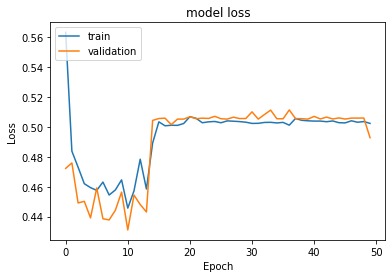

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# (Greatlearning Login)

* We can observe that our loss function and accuracy have increased and decreased respectively.

25/25 [==============================] - 0s 2ms/step
Best Threshold=0.256937, G-Mean=0.581


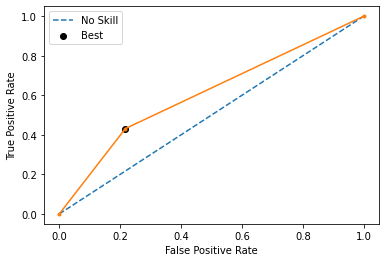

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# (Greatlearning Login)

In [ ]:
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

# (Greatlearning Login)

25/25 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

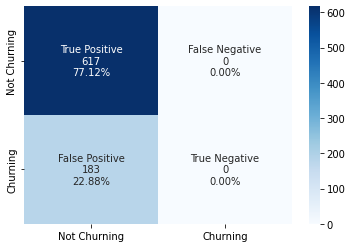

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm4,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

# (Greatlearning Login)

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

# (Greatlearning Login)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       617
           1       0.00      0.00      0.00       183

    accuracy                           0.77       800
   macro avg       0.39      0.50      0.44       800
weighted avg       0.59      0.77      0.67       800



Ther goal of hyperparameter tuning is to get a better F1 score, but the F1 score may differ each time.

Other hyperparameters can also be tuned to get better performance on the metrics.

(Greatlearning Login)

This model by far has the worse performance (a lot of overfitting) Here, the F1 score of the model has decreased in comparison to the previous best performance, as Random Search CV will choose the hyperparameters randomly, and hence has a very low chance of finding a highly optimal configuration.

Let's use the more exhaustive Grid Search CV and see if the F1 score increases.

## **Model 6**
**Grid Search CV**




In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# (Greatlearning Login)

In [ ]:
def create_model_v5(lr,batch_size):
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

    # (Greatlearning Login)

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

# (Greatlearning Login)

In [ ]:
import time
# store starting time
begin = time.time()

grid_result = grid.fit(X_train, y_train, validation_split=0.2, verbose=1)

# Summarizing results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
#store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

# (Greatlearning Login)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
63/63 [==============================] - 1s 7ms/step - loss: 0.4828 - accuracy: 0.7912 - val_loss: 0.4556 - val_accuracy: 0.7966
Best: 0.798214 using {'batch_size': 64, 'lr': 0.01}
Total runtime of the program is 35.887710094451904


The best model has the following configuration:

( It may vary each time the code runs )

**Result of Grid Search**

{'batch_size': 64, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration

(Greatlearning Login)

In [ ]:
estimator_v5=create_model_v5(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v5.summary()

# (Greatlearning Login)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               4352      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [ ]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

# (Greatlearning Login)

Epoch 1/50
63/63 [==============================] - 1s 6ms/step - loss: 0.4831 - accuracy: 0.7969 - val_loss: 0.4562 - val_accuracy: 0.7966
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4611 - accuracy: 0.8061 - val_loss: 0.4313 - val_accuracy: 0.8085
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4403 - accuracy: 0.8175 - val_loss: 0.4234 - val_accuracy: 0.8115
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4396 - accuracy: 0.8108 - val_loss: 0.4213 - val_accuracy: 0.8135
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4296 - accuracy: 0.8202 - val_loss: 0.4266 - val_accuracy: 0.8313
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4252 - accuracy: 0.8199 - val_loss: 0.4134 - val_accuracy: 0.8234
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4248 - accuracy: 0.8237 - val_loss: 0.4032 - val_accuracy: 0.8343
Epoch 8/50
63/63 [==

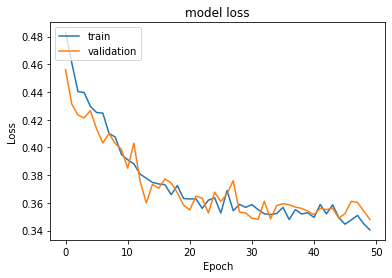

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# (Greatlearning Login)

From the above plot, we observe that both curves - train and validation, has noise but are generalizing well.

25/25 [==============================] - 0s 2ms/step
Best Threshold=0.175652, G-Mean=0.757


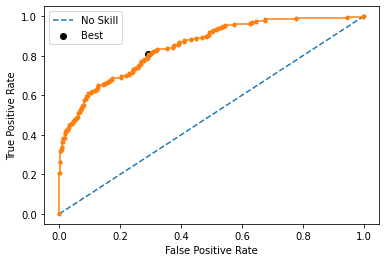

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# (Greatlearning Login)

In [ ]:
y_pred_e5=estimator_v5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

# (Greatlearning Login)

25/25 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

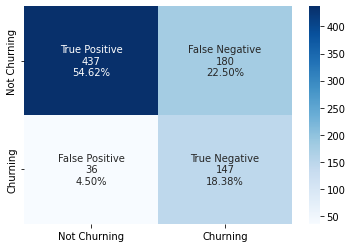

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm5,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

# (Greatlearning Login)

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

# (Greatlearning Login)

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       617
           1       0.45      0.80      0.58       183

    accuracy                           0.73       800
   macro avg       0.69      0.76      0.69       800
weighted avg       0.82      0.73      0.75       800



Hyperparameter tuning with Grid Search has been used here to get a better F1 score, but the F1 score might differ each time.

Other hyperparameters can also be tuned to get better metrics.

Here, the F1 score of the model, while better than in Randomized Search, is  lower than in Model 1.

## **Dask**
There is also another library called Dask, sometimes used in the industry to provide a performance boost to Hyperparameter Tuning due to its parallelized computing procedure.
Dask also has the option of implementing Grid Search similar to the Grid Search in Scikit-learn.
Installing the Dask library in Anaconda prompt using the below code:

!pip install dask-ml --user

(Greatlearning Login)

In [ ]:
# Installing dask in Google Colab
!pip install dask-ml

# (Greatlearning Login)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing library
from dask.ml.model_selection import GridSearchCV as DaskGridSearchCV

# (Greatlearning Login)

* Dask is the same as regular Grid Search in its functioning.
* We just have to change the function from GridSearchCV to DaskGridSearchCV.

(Greatlearning Login)

In [ ]:
def create_model_v6(lr,batch_size):
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# (Greatlearning Login)

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
dask = DaskGridSearchCV(estimator=keras_estimator,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

# (Greatlearning Login)

In [ ]:
import time

# store starting time
begin = time.time()


dask_result = dask.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

# (Greatlearning Login)

63/63 [==============================] - 1s 9ms/step - loss: 0.4979 - accuracy: 0.7927 - val_loss: 0.4696 - val_accuracy: 0.7966
Best: 0.798214 using {'batch_size': 64, 'lr': 0.001}
Total runtime of the program is 43.067806243896484


Unfortunately, Dask took more time to run the model when compared to Grid Search CV, and this is because Dask has some requirements to perform well:

* The dimension of the dataset should be large.
* Dask shows a significant performance improvement in computation when the number and range of hyperparameters we are tuning is large.
Since the dataset dimensions and hyperparameter number/range were small for this example, Dask couldn't show a significant improvement.

Let's use another optimization technique - Keras Tuner.

(Greatlearning Login)

In [ ]:
## Install Keras Tuner
!pip install keras-tuner

# (Greatlearning Login)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Keras Tuner**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# (Greatlearning Login)

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

# (Greatlearning Login)

* Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.

(Greatlearning Login)

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

# (Greatlearning Login)

In [ ]:
tuner.search_space_summary()

# (Greatlearning Login)

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [ ]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split=0.2)

# (Greatlearning Login)

In [ ]:
## Printing the best models with their hyperparameters
tuner.results_summary()

# (Greatlearning Login)

Results summary
Results in ./Job_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8323412537574768
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.831679900487264
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.8273809552192688
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.7999338706334432
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
unit

## **Model 7**
Let's create a model with the above mentioned best configuration given by Keras Tuner.

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

# (Greatlearning Login)

In [ ]:
model7.summary()

# (Greatlearning Login)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               2720      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 122,465
Trainable params: 122,465
Non-trai

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

# (Greatlearning Login)

In [ ]:
history_7 = model7.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

# (Greatlearning Login)

Epoch 1/50
63/63 [==============================] - 1s 6ms/step - loss: 0.4775 - accuracy: 0.7951 - val_loss: 0.4624 - val_accuracy: 0.7966
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4532 - accuracy: 0.8048 - val_loss: 0.4378 - val_accuracy: 0.8036
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4292 - accuracy: 0.8197 - val_loss: 0.4327 - val_accuracy: 0.8085
Epoch 4/50
63/63 [==============================] - 0s 5ms/step - loss: 0.4129 - accuracy: 0.8274 - val_loss: 0.4175 - val_accuracy: 0.8254
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4063 - accuracy: 0.8222 - val_loss: 0.4205 - val_accuracy: 0.8224
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 0.3804 - accuracy: 0.8433 - val_loss: 0.3812 - val_accuracy: 0.8343
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 0.3787 - accuracy: 0.8455 - val_loss: 0.3925 - val_accuracy: 0.8313
Epoch 8/50
63/63 [==

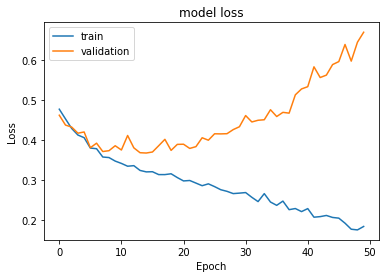

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# (Greatlearning Login)

From the above plot, we observe that the train and validation curves are overfitting.

25/25 [==============================] - 0s 2ms/step
Best Threshold=0.088159, G-Mean=0.731


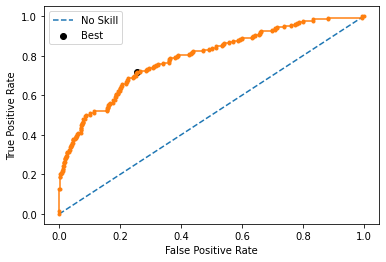

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# (Greatlearning Login)

In [ ]:
y_pred_e7=model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

# (Greatlearning Login)

25/25 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

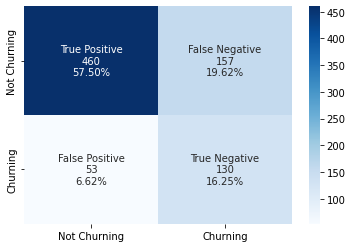

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test, y_pred_e7)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm7,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

# (Greatlearning Login)

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

# (Greatlearning Login)

              precision    recall  f1-score   support

           0       0.90      0.75      0.81       617
           1       0.45      0.71      0.55       183

    accuracy                           0.74       800
   macro avg       0.67      0.73      0.68       800
weighted avg       0.80      0.74      0.75       800



* After using the suggested hyperparameters from Keras Tuner, the F1 score has slightly increased, and the False Negative rate is lower in comparison to the previous optimization technique model.

* Further, we can add Batch Normalization and Dropout to the model and check the F1 score.

* Let's try to apply SMOTE to balance this dataset and then apply hyperparamter tuning accordingly.

# **SMOTE + Keras Tuner**

In [ ]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

# (Greatlearning Login)

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

# (Greatlearning Login)

In [ ]:
tuner_2 = RandomSearch(
    build_model_2,
    objective = 'val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

# (Greatlearning Login)

In [ ]:
tuner_2.search_space_summary()

# (Greatlearning Login)

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [ ]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

# (Greatlearning Login)

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

# (Greatlearning Login)

In [ ]:
model9.summary()

# (Greatlearning Login)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               2720      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 122,465
Trainable params: 122,465
Non-trai

In [ ]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

# (Greatlearning Login)

Epoch 1/50
101/101 [==============================] - 1s 7ms/step - loss: 0.5998 - accuracy: 0.6846 - val_loss: 1.0421 - val_accuracy: 0.2491
Epoch 2/50
101/101 [==============================] - 0s 5ms/step - loss: 0.5403 - accuracy: 0.7298 - val_loss: 0.9031 - val_accuracy: 0.4286
Epoch 3/50
101/101 [==============================] - 0s 4ms/step - loss: 0.5100 - accuracy: 0.7517 - val_loss: 0.8484 - val_accuracy: 0.4870
Epoch 4/50
101/101 [==============================] - 0s 4ms/step - loss: 0.4810 - accuracy: 0.7679 - val_loss: 0.6557 - val_accuracy: 0.6112
Epoch 5/50
101/101 [==============================] - 0s 4ms/step - loss: 0.4534 - accuracy: 0.7884 - val_loss: 0.7103 - val_accuracy: 0.5832
Epoch 6/50
101/101 [==============================] - 0s 5ms/step - loss: 0.4396 - accuracy: 0.7899 - val_loss: 0.7301 - val_accuracy: 0.5770
Epoch 7/50
101/101 [==============================] - 0s 4ms/step - loss: 0.4295 - accuracy: 0.7971 - val_loss: 0.4798 - val_accuracy: 0.7248
Epoch 

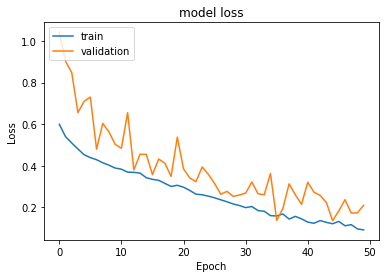

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# (Greatlearning Login)

From the above plot, we observe that there is noise in the model but the model is generalizing well.

25/25 [==============================] - 0s 2ms/step
Best Threshold=0.023318, G-Mean=0.746


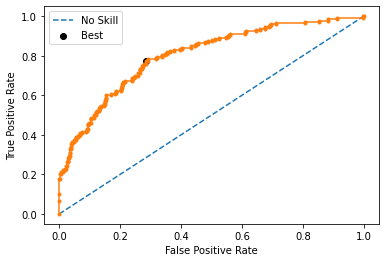

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat9 = model9.predict(X_test)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# (Greatlearning Login)

In [ ]:
y_pred_e9=model9.predict(X_test)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9

# (Greatlearning Login)

25/25 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [

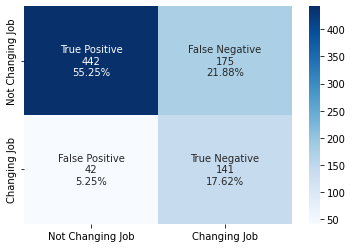

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_test, y_pred_e9)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm9,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

# (Greatlearning Login)

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e9)
print(cr6)

# (Greatlearning Login)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       617
           1       0.45      0.77      0.57       183

    accuracy                           0.73       800
   macro avg       0.68      0.74      0.68       800
weighted avg       0.81      0.73      0.75       800



After applying the SMOTE technique to the data, the F1 score decreased and the False Negative rate increased.

Let's use Grid Search CV and see if we can increase the model's performance on the metrics.

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v7(lr,batch_size):
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# (Greatlearning Login)

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)

# (Greatlearning Login)

In [ ]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1)

# (Greatlearning Login)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
126/126 [==============================] - 1s 5ms/step - loss: 0.4928 - accuracy: 0.7904 - val_loss: 0.4606 - val_accuracy: 0.7966


In [ ]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

# (Greatlearning Login)

Best: 0.798214 using {'batch_size': 32, 'lr': 0.001}


In [ ]:
estimator_v7=create_model_v7(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v7.summary()

# (Greatlearning Login)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               4352      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [ ]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

# (Greatlearning Login)

Epoch 1/50
202/202 [==============================] - 2s 5ms/step - loss: 0.6127 - accuracy: 0.6627 - val_loss: 0.8084 - val_accuracy: 0.5043
Epoch 2/50
202/202 [==============================] - 1s 4ms/step - loss: 0.5653 - accuracy: 0.7136 - val_loss: 0.9372 - val_accuracy: 0.4298
Epoch 3/50
202/202 [==============================] - 1s 4ms/step - loss: 0.5454 - accuracy: 0.7296 - val_loss: 0.7510 - val_accuracy: 0.5516
Epoch 4/50
202/202 [==============================] - 1s 4ms/step - loss: 0.5297 - accuracy: 0.7460 - val_loss: 0.7778 - val_accuracy: 0.4894
Epoch 5/50
202/202 [==============================] - 1s 4ms/step - loss: 0.5173 - accuracy: 0.7491 - val_loss: 0.6589 - val_accuracy: 0.6075
Epoch 6/50
202/202 [==============================] - 1s 4ms/step - loss: 0.5056 - accuracy: 0.7568 - val_loss: 0.7141 - val_accuracy: 0.5671
Epoch 7/50
202/202 [==============================] - 1s 4ms/step - loss: 0.4939 - accuracy: 0.7691 - val_loss: 0.5441 - val_accuracy: 0.6907
Epoch 

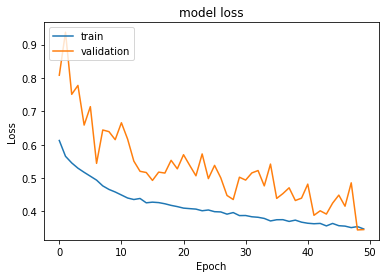

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# (Greatlearning Login)

From the above plot, we observe that there is a lot of noise in the validation but the model generalizes at 50 Epochs.



25/25 [==============================] - 0s 2ms/step
Best Threshold=0.532287, G-Mean=0.750


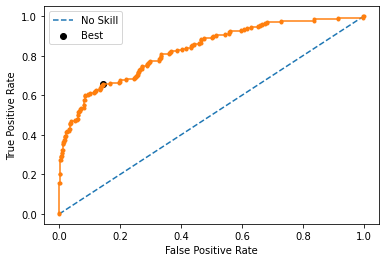

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat10 = estimator_v7.predict(X_test)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

# (Greatlearning Login)

In [ ]:
y_pred_e10=estimator_v7.predict(X_test)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

# (Greatlearning Login)

25/25 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

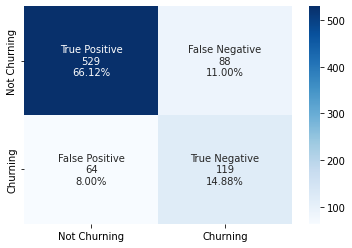

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm10=confusion_matrix(y_test, y_pred_e10)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churning']
make_confusion_matrix(cm10,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

# (Greatlearning Login)

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr10=metrics.classification_report(y_test,y_pred_e10)
print(cr10)

# (Greatlearning Login)

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       617
           1       0.57      0.65      0.61       183

    accuracy                           0.81       800
   macro avg       0.73      0.75      0.74       800
weighted avg       0.82      0.81      0.81       800



Oversampling using SMOTE did help improve the F1 score.

In this dataset, the SMOTE oversampling technique does work well.

So, our final model here can be **Model 1**, which works on the imbalanced dataset. **Model 1** has the lowest prediction for False Negatives.

**Suggested Areas of Improvement**
* Build any one Machine Learning model, and use that to get the feature importance of the variables. Try to use that in the neural network model.

* You can try to do better feature engineerning by removing the flaws of the skewed variables if required.

## **Business Recommendations**

**Rewrite Statements**
* The bank can deploy the **Model 1** from this exercise to identify with a reasonable degree of accuracy whether a customer will leave or not in the next 6 months, and this process seems to be easier and more time-efficient than other methods.

A simple neural network model gives better results as seen from the confusion matrix as well as an improved F1 score. This maybe due to the small dataset. Using a larger dataset would require optimising the model to get better results.





# **References:**

Greatlearning Login. https://olympus.mygreatlearning.com/login.

Bank Customer Churn Prediction. https://kaggle.com/code/kmalit/bank-customer-churn-prediction.